In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic = pd.read_csv(r'C:\Users\DELL\Downloads\3PythonCourse\Refactored_Py_DS_ML_Bootcamp-master\13-Logistic-Regression\titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# EDA

Lets begin our exploratory data analysis by analysing the missing values

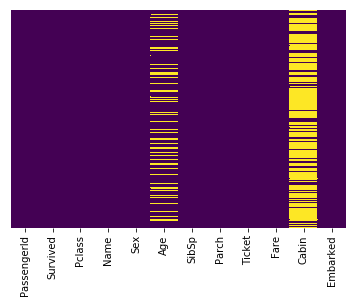

In [6]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We can see that the columns Age and Cabin have null values
However the column cabin have the highest number of null values

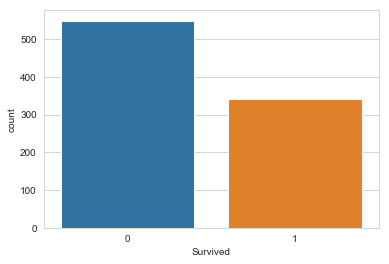

In [7]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = titanic)

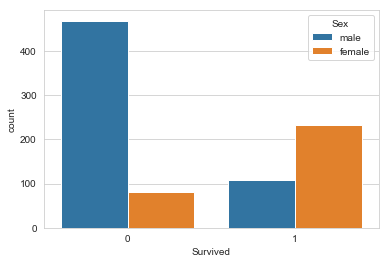

In [8]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = titanic, hue = 'Sex')

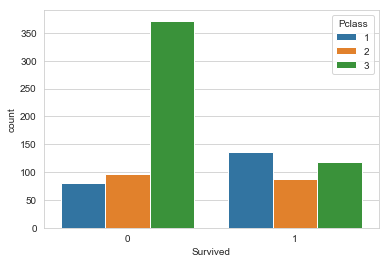

In [9]:
sns.set_style(style = 'whitegrid')
sns.countplot(x = 'Survived', data = titanic, hue = 'Pclass')

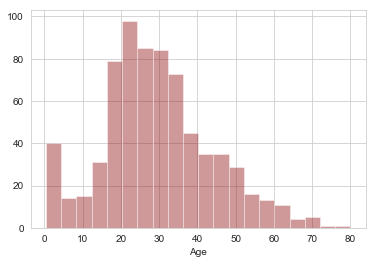

In [10]:
sns.distplot(titanic['Age'].dropna(), kde = False, color='darkred', bins = 20)

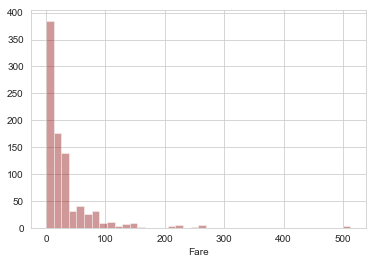

In [11]:
sns.distplot(titanic['Fare'], kde = False, color='darkred', bins = 40)

## Data Cleaning

As we have seen above that the column Age has  null values. Therefore we need to fill in these null values. One way to do this is by dropping the null values rows but that would incur in the loss of so much information, other way to do this is by filling the mean value of all the passengers. 

However we do have other option also where we will check the average age of the passengers wrt to their passenger_class.Let us see how.

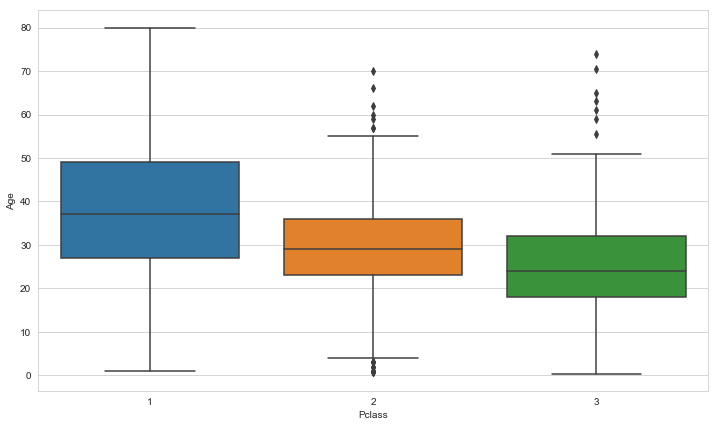

In [12]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic )

We can see that the passenger in 1st class seems to older as compared to others as they can be wealthier, which makes sense.
We will take out average age of the passengers with respect to passenger class: For Pclass 1= 37, pclass 2= 29 and pclass 3 = 24

Now we will create a function using these average age values based on Pclass for age

In [13]:
def age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2:
            return 29
        
        else: 
            return 24
        
        
    else: 
        return Age  

In [14]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age, axis = 1)

Let us check the heatmap again

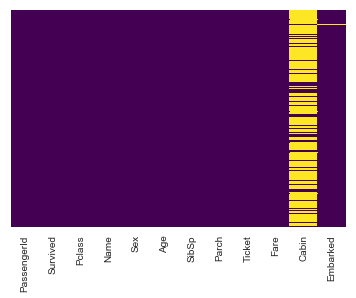

In [15]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Now since the column 'Cabin' have a lot of missing data. Hence we will drop this particular table

In [16]:
titanic.drop('Cabin', axis = 1,  inplace = True)

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


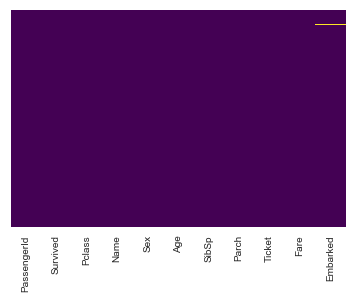

In [18]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

The dataset contains a single null value in the Embarked column hence we will drop that particular row

In [19]:
titanic.dropna(inplace = True)

## Conversion of Categical variables

We will now convert the categorical variables into dummy variables as ML models algorithms don't take those features as inputs.

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


The columns Sex and Embarked have categorical variables. Hence we will convert these into dummy variables.

In [21]:
sex = pd.get_dummies(titanic['Sex'], drop_first = True)
embark = pd.get_dummies(titanic['Embarked'], drop_first = True)

## dropping all the unnecessary columns including Name and Ticket

In [22]:
titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [25]:
titanic = pd.concat([titanic, sex, embark], axis = 1)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building Logistic Regression Model

Since our data is ready we will now build the model. We will split the data into training and test data.

In [29]:
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101 )

## Training the Model and Prediction

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logreg = LogisticRegression()

In [38]:
logreg.fit(X_train, y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
prediction = logreg.predict(X_test)

## Evaluation

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

